<a href="https://colab.research.google.com/github/lucasferreiraos/curso-aprendizado-de-maquina-na-pratica/blob/master/%C3%81rvore_de_Decis%C3%A3o_Consumo_de_%C3%A1lcool_por_estudantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
 
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
 
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve
)

In [70]:
data_math = pd.read_csv('/content/drive/My Drive/Datasets/student-alcohol-consumption/student-mat.csv')
data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [71]:
'Linhas: {} | Colunas: {}'.format(data_math.shape[0], data_math.shape[1])

'Linhas: 395 | Colunas: 33'

## Pré-processamento dos dados

Na célula acima vemos que o dataset tem apenas 395 instâncias. Pode ser um quantia muito baixa para que o nosso modelo aprenda, mas vamos seguir e ver o que acontece.

Nas próximas 3 células está sendo feito o trabalho de transformação de variáveis categóricas em variáveis numéricas.

In [72]:
labels = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

for label in labels:
    data_math[label] = data_math[label].replace(['yes', 'no'], [1, 0])

In [73]:
data_math['school'] = data_math['school'].replace(['GP', 'MS'], [1, 0])
data_math['sex'] = data_math['sex'].replace(['F', 'M'], [1, 0])
data_math['address'] = data_math['address'].replace(['U', 'R'], [1, 0])
data_math['famsize'] = data_math['famsize'].replace(['GT3', 'LE3'], [1, 0])
data_math['Pstatus'] = data_math['Pstatus'].replace(['T', 'A'], [1, 0])

In [74]:
label_encoder = LabelEncoder()

data_math.Mjob = label_encoder.fit_transform(data_math.Mjob)
data_math.Fjob = label_encoder.fit_transform(data_math.Fjob)
data_math.reason = label_encoder.fit_transform(data_math.reason)
data_math.guardian = label_encoder.fit_transform(data_math.guardian)

In [75]:
data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,1,18,1,1,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,1,1,17,1,1,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,1,1,15,1,0,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,1,1,15,1,1,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,1,1,16,1,1,1,3,3,2,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10


In [76]:
X = data_math.iloc[:,:-1]
y = data_math.G3

In [77]:
X = (X - X.min()) / (X.max() - X.min())
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,1.0,1.0,0.428571,1.0,1.0,0.0,1.00,1.00,0.00,1.00,0.000000,0.5,0.333333,0.333333,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.75,0.50,0.75,0.00,0.00,0.5,0.080000,0.1250,0.315789
1,1.0,1.0,0.285714,1.0,1.0,1.0,0.25,0.25,0.00,0.50,0.000000,0.0,0.000000,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.00,0.50,0.50,0.00,0.00,0.5,0.053333,0.1250,0.263158
2,1.0,1.0,0.000000,1.0,0.0,1.0,0.25,0.25,0.00,0.50,0.666667,0.5,0.000000,0.333333,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.75,0.50,0.25,0.25,0.50,0.5,0.133333,0.2500,0.421053
3,1.0,1.0,0.000000,1.0,1.0,1.0,1.00,0.50,0.25,0.75,0.333333,0.5,0.000000,0.666667,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.50,0.25,0.25,0.00,0.00,1.0,0.026667,0.7500,0.736842
4,1.0,1.0,0.142857,1.0,1.0,1.0,0.75,0.75,0.50,0.50,0.333333,0.0,0.000000,0.333333,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.75,0.50,0.25,0.00,0.25,1.0,0.053333,0.1875,0.526316


Uma coisa a ser notada: eu apliquei a reescala dos dados apenas em `X` porque a árvore de decisão só aceita que o `y`, que é nosso target, tenha valores inteiros.

## Classificação utilizando Árvore de Decisão



In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [79]:
DT_classificador = DecisionTreeClassifier()

In [80]:
DT_classificador.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [81]:
plt.rcParams["figure.figsize"] = (30,20)

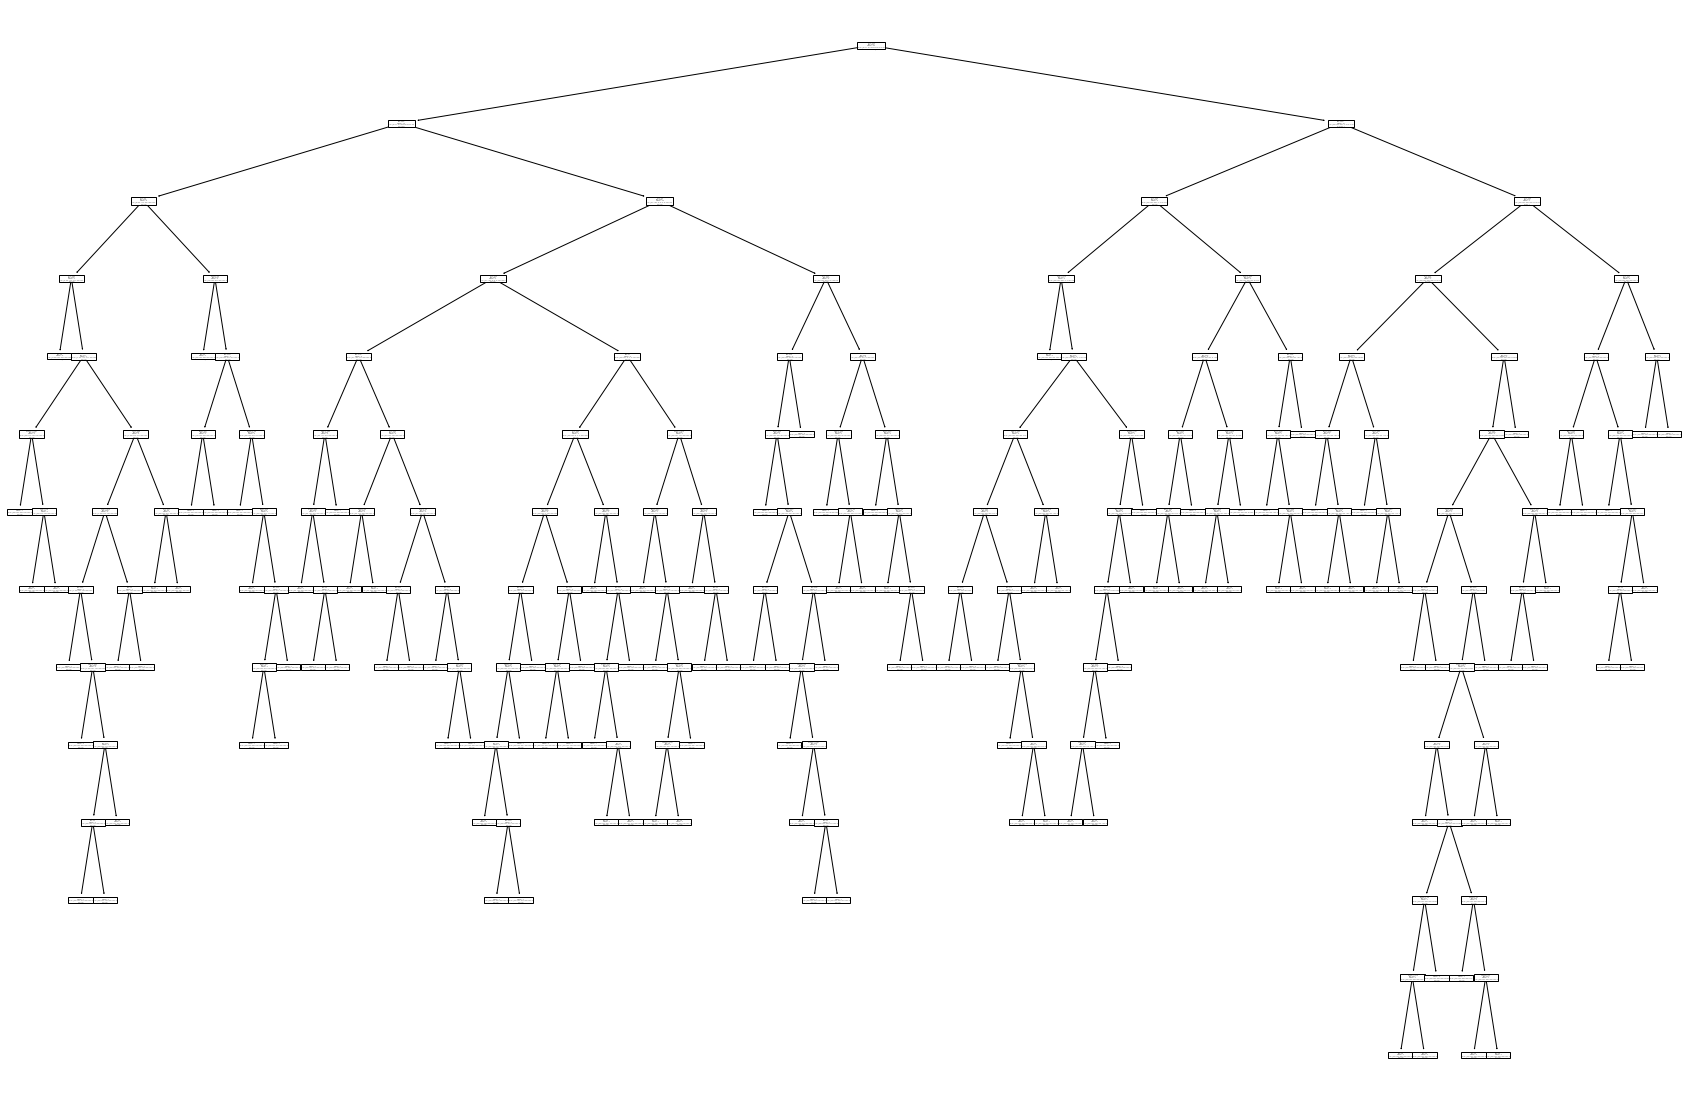

In [82]:
plot_tree(DT_classificador,feature_names=data_math.columns[:-1])
plt.show()

In [83]:
predicoes = DT_classificador.predict(X_test)

In [84]:
acuracia = accuracy_score(y_test, predicoes)
acuracia

0.35443037974683544

In [85]:
precisao = precision_score(y_test, predicoes, average='weighted')
precisao

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.3392555756479807

In [86]:
recall = recall_score(y_test, predicoes, average='weighted')
recall

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.35443037974683544

In [87]:
f1 = f1_score(y_test, predicoes, average='weighted')
f1

0.3394103786508849

Então... bem ruim, né? Isso pode ter acontecido por três motivos:

- A baixa correlação entre as variáveis - [veja aqui](https://github.com/lucasferreiraos/curso-aprendizado-de-maquina-na-pratica/blob/master/Consumo_de_%C3%A1lcool_de_estudantes.ipynb). 
- A quantidade de instâncias no dataset, que já vimos que é bem baixa;
- E um possível desbalanceamento das classes no dataset, que ainda não foi investigado.

Acho que pode ser uma boa aposta investigar o terceiro ponto citado, já que isso não havia sido feito anteriormente.

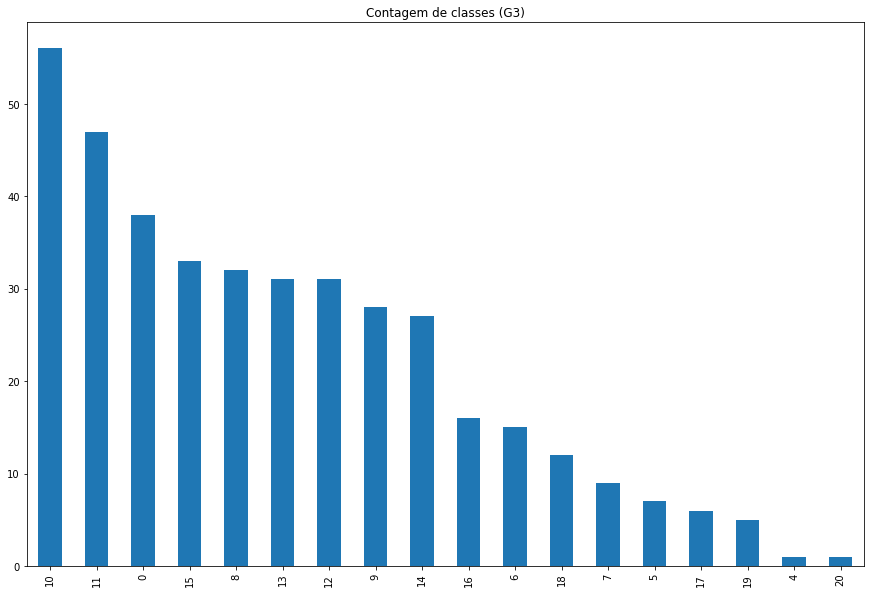

In [88]:
target_count = data_math.G3.value_counts()
plt.figure(figsize=(15, 10))
target_count.plot(kind='bar', title='Contagem de classes (G3)')

O gráfico mostra que as classes estão bem desbalanceadas. Outra coisa que acontece é que sabemos que o gráfico mostra apenas 18 das 21 classes existentes que vão de 0 a 20, [descrito neste notebook](https://github.com/lucasferreiraos/curso-aprendizado-de-maquina-na-pratica/blob/master/Consumo_de_%C3%A1lcool_de_estudantes.ipynb). Isso pode prejudicar a performance do modelo em produção quando ele precisar classificar uma instância desconhecida que deve ser rotulada com uma classe que ele não viu durante o treino.

Uma solução que pode ser adotada é associar uma faixa de valores a um novo valor, o que é comum em alguns lugares do mundo, onde o sistema de ensino mede a performance do(a) aluno(a) através de "conceito" (conceito A, conceito B, etc). O resultado disso é que vamos obter um número menor de classes, 5 por exexmplo, onde cada nova classe vai representar uma faixa de valores das classes antigas. Vejamos:

`0, 1, 2, 3, 4 = 0`

`5, 6, 7, 8 = 1`

`9, 10, 11, 12 = 2`

`13, 14, 15, 16 = 3`

`17, 18, 19, 20 = 4`



In [89]:
data_math['G3'] = data_math['G3'].replace([0, 1, 2, 3, 4], 0)
data_math['G3'] = data_math['G3'].replace([5, 6, 7, 8], 1)
data_math['G3'] = data_math['G3'].replace([9, 10, 11, 12], 2)
data_math['G3'] = data_math['G3'].replace([13, 14, 15, 16], 3)
data_math['G3'] = data_math['G3'].replace([17, 18, 19, 20], 4)

In [90]:
data_math.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,1,18,1,1,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,1
1,1,1,17,1,1,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,1
2,1,1,15,1,0,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,2
3,1,1,15,1,1,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,3
4,1,1,16,1,1,1,3,3,2,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,2
5,1,0,16,1,0,1,4,3,3,2,3,1,1,2,0,0,1,1,1,1,1,1,0,5,4,2,1,2,5,10,15,15,3
6,1,0,16,1,0,1,2,2,2,2,1,1,1,2,0,0,0,0,0,1,1,1,0,4,4,4,1,1,3,0,12,12,2
7,1,1,17,1,1,0,4,4,2,4,1,1,2,2,0,1,1,0,0,1,1,0,0,4,1,4,1,1,1,6,6,5,1
8,1,0,15,1,0,0,3,2,3,2,1,1,1,2,0,0,1,1,0,1,1,1,0,4,2,2,1,1,1,0,16,18,4
9,1,0,15,1,1,1,3,4,2,2,1,1,1,2,0,0,1,1,1,1,1,1,0,5,5,1,1,1,5,0,14,15,3


Observe a coluna `G3` e veja que não temos mais valores 12, 8, 15, etc.

Agora, vamos ver se ainda temos desbalanceamento entre as classes.

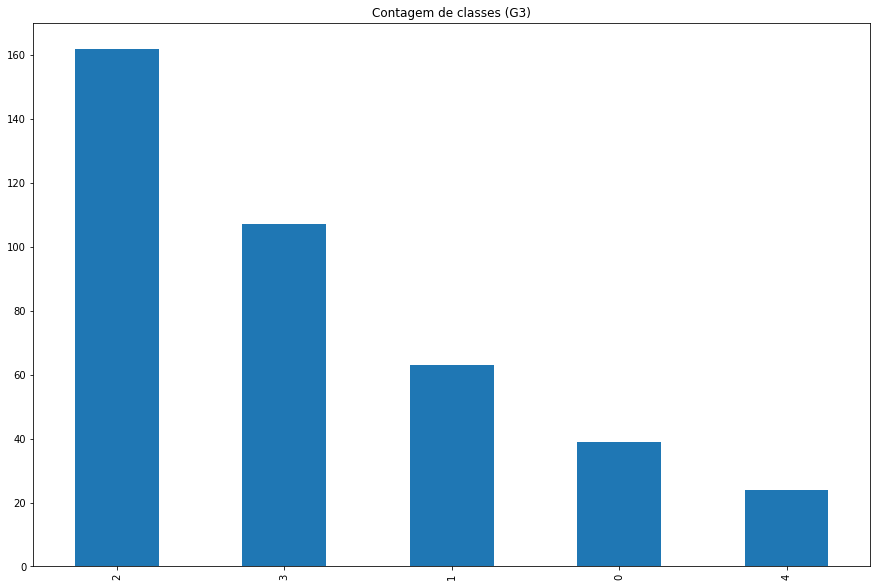

In [91]:
target_count = data_math.G3.value_counts()
plt.figure(figsize=(15, 10))
target_count.plot(kind='bar', title='Contagem de classes (G3)')

O problema de desbalanceamento ainda persiste. Para resolver esse problema, existe uma técnica que se chama **resampling** (ou reamostragem), que consiste em igualar o número de instâncias de acordo com a quantidade de instâncias por classe. Você pode fazer resampling de duas formas:

- **Random over-sampling**: Aumentando o número de instâncias (novas instâncias geradas aleatoriamente), igualando-as com a classe majoritária.

- **Random under-sampling**: Diminuindo o número de instâncias da(s) classe(s) majoritária(s) (eliminando instâncias aleatoriamente), igualando-as com a classe que tem o menor número de instâncias.

Qual escolher? Depende. Eu vou escolher a primeira abordagem porque meu dataset tem poucos registros e usar under-sampling nesse caso poderia me trazer perda de informação.

In [92]:
count_class_0 = data_math.query('G3 == 0').shape[0]
count_class_1 = data_math.query('G3 == 1').shape[0]
count_class_2 = data_math.query('G3 == 2').shape[0]
count_class_3 = data_math.query('G3 == 3').shape[0]
count_class_4 = data_math.query('G3 == 4').shape[0]

O primeiro passo é pegar a quantidade de instâncias por classe.

In [93]:
print("Classe 0:", count_class_0)
print("Classe 1:", count_class_1)
print("Classe 2:", count_class_2)
print("Classe 3:", count_class_3)
print("Classe 4:", count_class_4)

Classe 0: 39
Classe 1: 63
Classe 2: 162
Classe 3: 107
Classe 4: 24


O segundo passo é fazer o resampling tendo como parâmetro a classe majoritária que, nesse caso, é a classe 2. Para isso, vamos guardar cada conjunto de registros de acordo com cada classe existente.

In [94]:
data_math_0 = data_math.query('G3 == 0')
data_math_1 = data_math.query('G3 == 1')
data_math_2 = data_math.query('G3 == 2')
data_math_3 = data_math.query('G3 == 3')
data_math_4 = data_math.query('G3 == 4')

In [95]:
data_math_class_0_over = data_math_0.sample(count_class_2, replace=True)
data_math_class_1_over = data_math_1.sample(count_class_2, replace=True)
data_math_class_3_over = data_math_3.sample(count_class_2, replace=True)
data_math_class_4_over = data_math_4.sample(count_class_2, replace=True)

In [96]:
print(len(data_math_class_0_over))
print(len(data_math_class_1_over))
print(len(data_math_class_3_over))
print(len(data_math_class_4_over))

162
162
162
162


Veja no print acima que agora as outras classes tem a mesma quantidade de instância que a classe 2. Vamos forma um novo objeto `DataFrame` e em seguida visualizar o resultado do resampling em um gráfico.

In [97]:
data_math_over = pd.concat(
    [data_math_class_0_over, data_math_class_1_over, data_math_2, data_math_class_3_over, data_math_class_4_over],
    axis=0
)

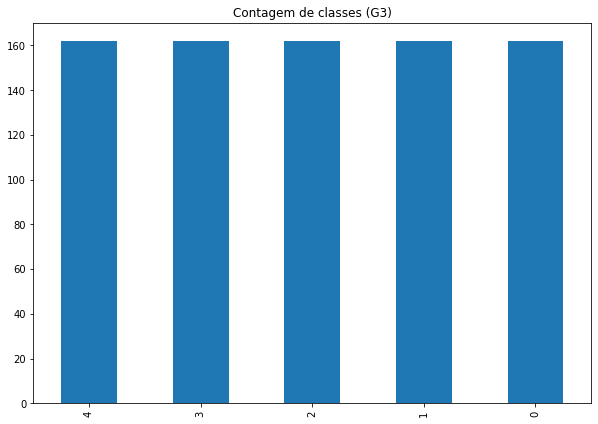

In [98]:
plt.figure(figsize=(10, 7))
data_math_over.G3.value_counts().plot(kind='bar', title='Contagem de classes (G3)')
plt.show()

Veja, realmente deu certo! Agora aplicamos a reescala novamente e treinaremos um novo modelo. Lembrando que a reescala não deve ser aplicada ao nosso target.

In [99]:
X = data_math_over.iloc[:,:-1]
y = data_math_over.G3

In [100]:
X = (X - X.min()) / (X.max() - X.min())

In [101]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2)

In [102]:
DT_classificador_2 = DecisionTreeClassifier()

In [103]:
DT_classificador_2.fit(X_train_2, y_train_2)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [104]:
plt.rcParams["figure.figsize"] = (30,20)

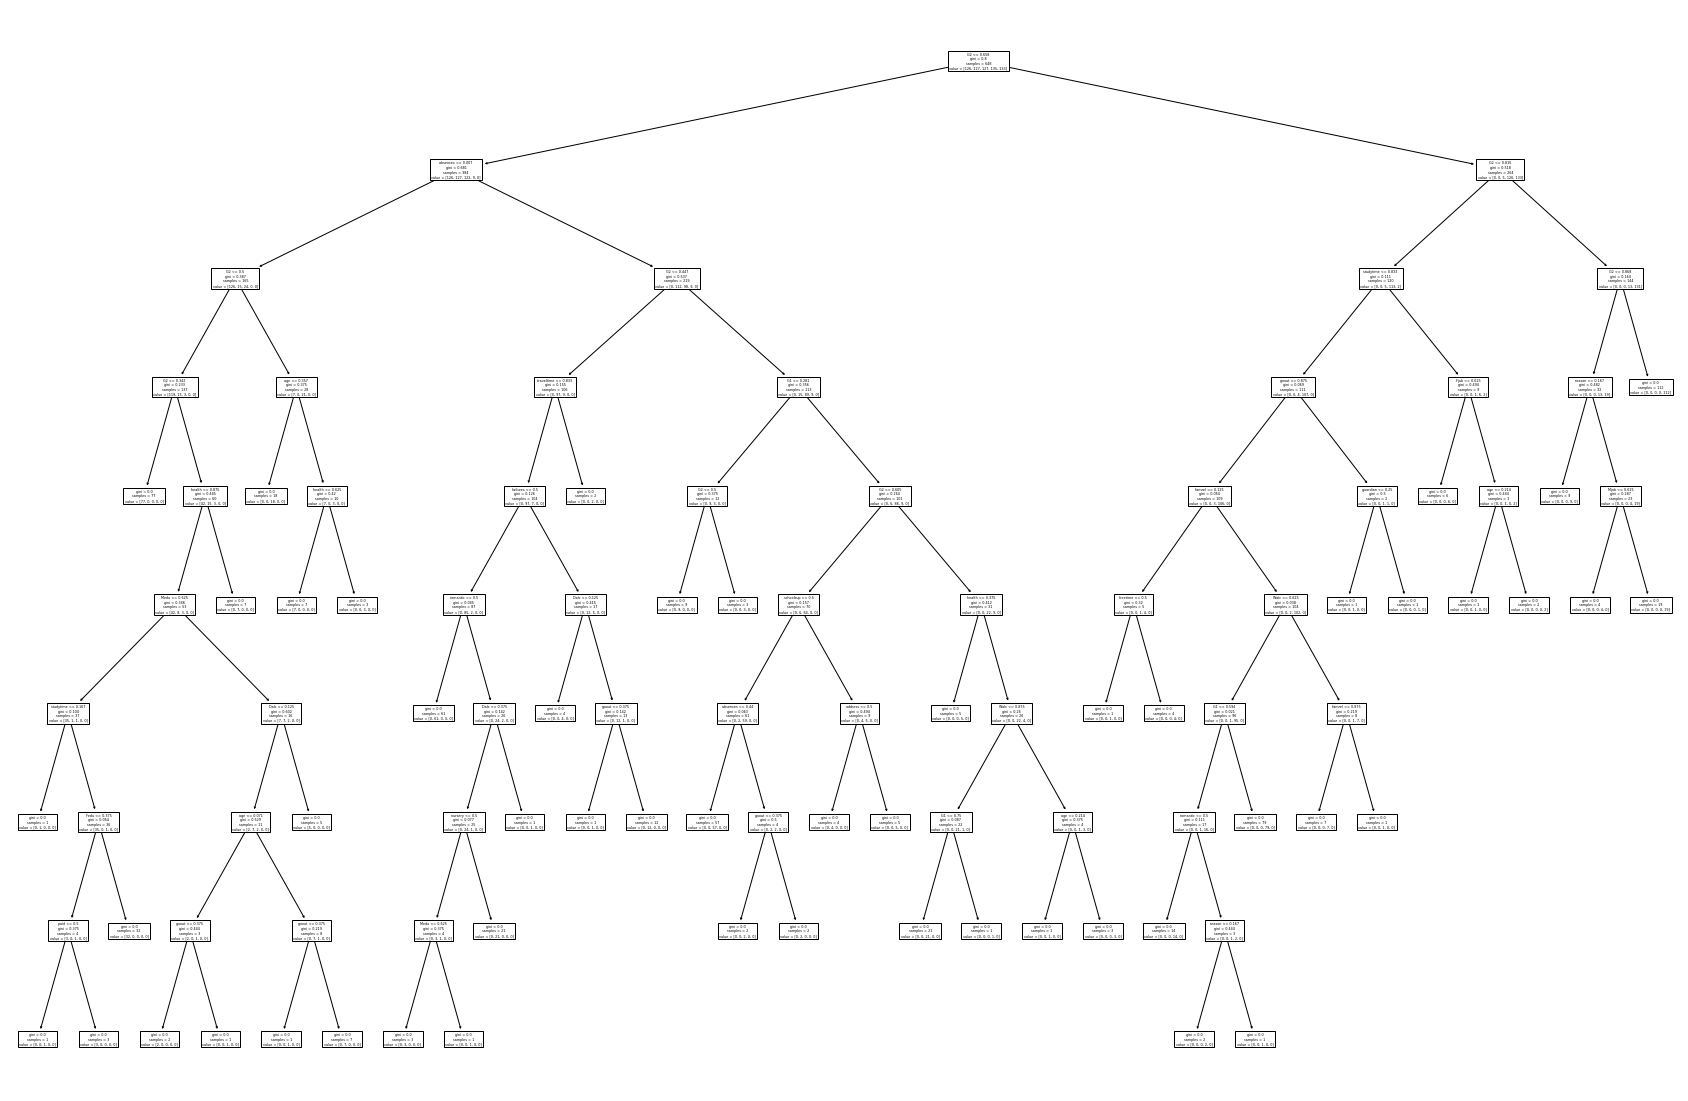

In [105]:
plot_tree(DT_classificador_2,feature_names=data_math_over.columns[:-1])
plt.show()

In [106]:
predicoes_2 = DT_classificador_2.predict(X_test_2)

In [107]:
acuracia = accuracy_score(y_test_2, predicoes_2)
acuracia

0.9629629629629629

In [108]:
precisao = precision_score(y_test_2, predicoes_2, average='weighted')
precisao

0.9654432109060058

In [109]:
recall = recall_score(y_test_2, predicoes_2, average='weighted')
recall

0.9629629629629629

In [110]:
f1 = f1_score(y_test_2, predicoes_2, average='weighted')
f1

0.9618701076320939

Uma diferença gigantesca entre o primeiro modelo e o segundo modelo! Todas as métricas atingiram a cada dos 96%.

Eu poderia ter tentado qualquer uma das duas abordagens listadas antes do segundo treinamento, mas eu percebi que não tinha analisado o balanceamento das classes no dataset, o que é um passo importante na análise exploratória. Então achei prudente adotar essa estratégia antes de tentar as outras.